In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import sowfadict as sowfa
import tools
import pandas as pd
from matplotlib.colors import Normalize
import gzip
import matplotlib.colors as colors
from scipy.interpolate import interp1d

# Set user variables

In [34]:
fdir    = '/projects/mmc/NWTCRegion/'
simstr  = ['PGx4.4En4_zi550']

caselbl = ['a.) Complex Terrain','b.) Smoothed Terrain']
cases   = ['M2_SR_NoTurbBC','M2_D2_NoTurbBC']
ncases  = np.shape(cases)[0]


timedir = 30600
nx = 896; ny = 208; nz = 75

lblsize = 14.0
txtsize = 12.0
legsize = 10.0
savedir = '/home/phawbeck/SOWFA/Terrain/img/'


# Read in the x, y, and z coords

In [35]:
xxf = gzip.open('{}/{}/NWTC.run.{}/constant/ccx.gz'.format(fdir,simstr[0],cases[0]),'r')
xxSR = xxf.readlines()[22:-15]
xxf.close()

yyf = gzip.open('{}/{}/NWTC.run.{}/constant/ccy.gz'.format(fdir,simstr[0],cases[0]),'r')
yySR = yyf.readlines()[22:-15]
yyf.close()

zzf = gzip.open('{}/{}/NWTC.run.{}/constant/ccz.gz'.format(fdir,simstr[0],cases[0]),'r')
zzSR = zzf.readlines()[22:-15]
zzf.close()

xxf = gzip.open('{}/{}/NWTC.run.{}/constant/ccx.gz'.format(fdir,simstr[0],cases[1]),'r')
xxD2 = xxf.readlines()[22:-15]
xxf.close()

yyf = gzip.open('{}/{}/NWTC.run.{}/constant/ccy.gz'.format(fdir,simstr[0],cases[1]),'r')
yyD2 = yyf.readlines()[22:-15]
yyf.close()

zzf = gzip.open('{}/{}/NWTC.run.{}/constant/ccz.gz'.format(fdir,simstr[0],cases[1]),'r')
zzD2 = zzf.readlines()[22:-15]
zzf.close()

### Turn them into a grid for the lowest layer

In [36]:
x = np.zeros((2,nx,ny,nz))
y = np.zeros((2,nx,ny,nz))
z = np.zeros((2,nx,ny,nz))

ct = 0
for kk in range(0,nz):
    for jj in range(0,ny):
        for ii in range(0,nx):
            x[0,ii,jj,kk] = np.float(xxSR[ct])
            y[0,ii,jj,kk] = np.float(yySR[ct])
            z[0,ii,jj,kk] = np.float(zzSR[ct])
            x[1,ii,jj,kk] = np.float(xxD2[ct])
            y[1,ii,jj,kk] = np.float(yyD2[ct])
            z[1,ii,jj,kk] = np.float(zzD2[ct])
            ct += 1

# Read in U and T averages

In [37]:
u   = np.zeros((ncases,nx,ny,nz))
v   = np.zeros((ncases,nx,ny,nz))
w   = np.zeros((ncases,nx,ny,nz))

for cc in range(0,ncases):
    
    Uf = gzip.open('{}/{}/NWTC.run.{}/{}/U.gz'.format(fdir,simstr[0],cases[cc],timedir),'r')
    U1 = Uf.readlines()[22:-15]
    Uf.close()
    for ll,line in enumerate(U1):
        U1[ll] = line.decode()
    print('Got U')
    
    ct = 0
    for kk in range(0,nz):
        for jj in range(0,ny):
            for ii in range(0,nx):
                uline   = U1[ct].replace('(','').replace(')','').split()
                u[cc,ii,jj,kk]   = np.float(uline[0])
                v[cc,ii,jj,kk]   = np.float(uline[1])
                w[cc,ii,jj,kk]   = np.float(uline[2])
                ct += 1
    print('Done with {}'.format(cases[cc]))

Got U
Done with M2_SR_NoTurbBC
Got U
Done with M2_D2_NoTurbBC


### Vertical Slices

104
21.8450907172 -6.14101583402
20.4013611805 -0.811492363002
/home/phawbeck/SOWFA/Terrain/img/PGx4.4En4_zi550_Uslice_xz_y10m.png


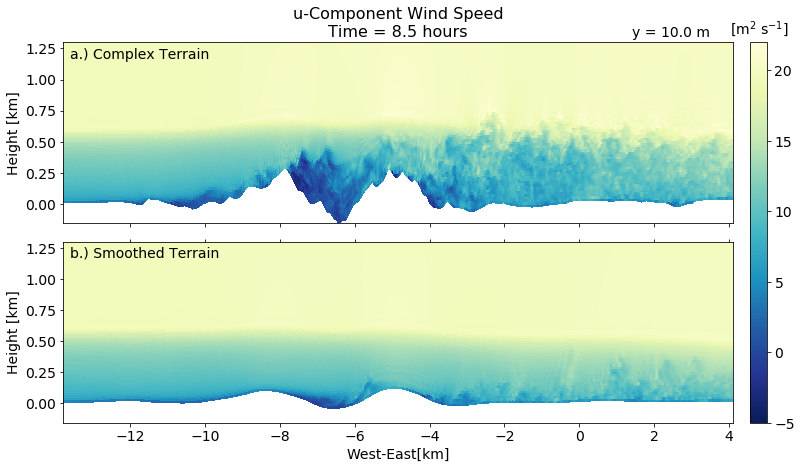

In [38]:
savefig = True
yloc = int(ny/2)
print(yloc)
# For accented 2.2_1100_D2 cases:
umin = -5; umax = 22
textx = -13.6 ; texty = 1.26
ymin = np.min(z[0,:,yloc,:]/1000.0); ymax = 1.3
fig, ax = plt.subplots(nrows=ncases,figsize=(12,7),sharex=True)
fig.subplots_adjust(hspace=0.1)
for cc in range(0,ncases):
    print(np.max(u[cc,:,yloc,:]),np.min(u[cc,:,yloc,:]))
    cont = ax[cc].pcolormesh(x[cc,:,yloc,:]/1000.0,z[cc,:,yloc,:]/1000.0,u[cc,:,yloc,:],rasterized=True,
                             cmap=plt.cm.YlGnBu_r,norm=colors.Normalize(umin,umax))
    ax[cc].tick_params(labelsize=14)
    ax[cc].set_ylim(ymin,ymax)
    if cc > 0: ax[cc].tick_params(top=True)
    ax[cc].text(textx,texty,caselbl[cc],size=14,va='top',ha='left',color='k')
    ax[cc].set_ylabel('Height [km]',size=14)
ax[1].set_xlabel('West-East[km]',size=14)
cax1 = fig.add_axes([0.92, 0.125, 0.02, 0.755])
plt.colorbar(cont,cax1)
cax1.tick_params(labelsize=14)
cax1.text(10.0,umax*1.01,'[m$^2$ s$^{-1}$]',size=14,ha='center',va='bottom')
ax[0].set_title('u-Component Wind Speed\nTime = {} hours'.format(timedir/3600),size=16)
ax[0].text(3.5,1.32,'y = {0:2.1f} m'.format(y[0,0,yloc,0]),va='bottom',ha='right',size=14)
print('{}{}_Uslice_xz_y{}m.png'.format(savedir,simstr[0],int(round(y[0,0,yloc,0]))))
if savefig:
    plt.savefig('{}{}_Uslice_xz_y{}m.png'.format(savedir,simstr[0].replace('.','p'),int(round(y[0,0,yloc,0]))))
    plt.savefig('{}{}_Uslice_xz_y{}m.pdf'.format(savedir,simstr[0].replace('.','p'),int(round(y[0,0,yloc,0]))))
plt.show()


### Horizontal Slices

In [ ]:
savefig = True
lvl = 5
umin = -8; umax = 16
textx = -13.6 ; texty = 1.98

fig, ax = plt.subplots(nrows=ncases,figsize=(12,12),sharex=True)
fig.subplots_adjust(hspace=0.1)
for cc in range(0,ncases):
    cont = ax[cc].pcolormesh(x[:,:,lvl]/1000.0,y[:,:,lvl]/1000.0,u[cc,:,:,lvl],rasterized=True,
                             norm=Normalize(umin,umax),cmap=plt.cm.YlGnBu_r)
    ax[cc].tick_params(labelsize=14)
    if cc > 0: ax[cc].tick_params(top=True)
    ax[cc].text(textx,texty,caselbl[cc],size=14,va='top',ha='left')
ax[1].set_ylabel('South-North [km]',size=14)
ax[2].set_xlabel('West-East[km]',size=14)
cax1 = fig.add_axes([0.92, 0.125, 0.02, 0.755])
plt.colorbar(cont,cax1)
cax1.tick_params(labelsize=14)
cax1.text(10.0,umax*1.01,'[m s$^{-1}$]',size=14,ha='center',va='bottom')
ax[0].set_title('u-Component Wind Speed\nTime = {} hours'.format(timedir/3600),size=16)
ax[0].text(3.5,2.15,'Level: {} m'.format(10.0 + lvl*20.0),va='bottom',ha='right',size=14)
print('{}{}_{}_Uslice_xy_{}m.png'.format(savedir,simstr[cc],terrstr,int(10.0 + 20.0*lvl)))
if savefig:
    plt.savefig('{}{}_{}_Uslice_xy_{}m.png'.format(savedir,simstr[cc].replace('.','p'),terrstr,int(10.0 + 20.0*lvl)))
    plt.savefig('{}{}_{}_Uslice_xy_{}m.pdf'.format(savedir,simstr[cc].replace('.','p'),terrstr,int(10.0 + 20.0*lvl)))
plt.show()


In [ ]:
savefig = True
lvl = 3
textx = -13.6 ; texty = 1.98
#tkemin = 5e-2; tkemax = 5
tkemin = 1e-2; tkemax = 30
fig, ax = plt.subplots(nrows=ncases,figsize=(12,12),sharex=True)
fig.subplots_adjust(hspace=0.1)
for cc in range(0,ncases):
    print(np.max(tke[cc,:,:,lvl]))
    cont = ax[cc].pcolormesh(x[:,:,lvl]/1000.0,y[:,:,lvl]/1000.0,tke[cc,:,:,lvl],rasterized=True,
                             cmap=plt.cm.Spectral_r,norm=colors.LogNorm(tkemin,tkemax))
    ax[cc].tick_params(labelsize=14)
    if cc > 0: ax[cc].tick_params(top=True)
    ax[cc].text(textx,texty,caselbl[cc],size=14,va='top',ha='left')
ax[1].set_ylabel('South-North [km]',size=14)
ax[2].set_xlabel('West-East[km]',size=14)
cax1 = fig.add_axes([0.92, 0.125, 0.02, 0.755])
plt.colorbar(cont,cax1)
cax1.tick_params(labelsize=14)
cax1.text(10.0,tkemax*1.01,'[m$^2$ s$^{-1}$]',size=14,ha='center',va='bottom')
ax[0].set_title('u-Component Wind Speed\nTime = {} hours'.format(timedir/3600),size=16)
ax[0].text(3.5,2.15,'Level: {} m'.format(10.0 + lvl*20.0),va='bottom',ha='right',size=14)
print('{}{}_{}_TKEslice_xy_{}m.png'.format(savedir,simstr[cc],terrstr,int(10.0 + 20.0*lvl)))
if savefig:
    plt.savefig('{}{}_{}_TKEslice_xy_{}m.png'.format(savedir,simstr[cc].replace('.','p'),terrstr,int(10.0 + 20.0*lvl)))
    plt.savefig('{}{}_{}_TKEslice_xy_{}m.pdf'.format(savedir,simstr[cc].replace('.','p'),terrstr,int(10.0 + 20.0*lvl)))
plt.show()
